# Selling prices of Soft wheat - prices per 100 kg (Italy). Analýza  časových řad

## 1. Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import itertools
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
data = pd.DataFrame({
    "year": range(2000, 2024),
    "price": [
        15.24, 15.76, 14.29, 14.81, 15.51, 12.63, 14.45, 20.80, 22.31, 15.38,
        18.24, 24.86, 24.56, 33.07, 20.40, 19.47, 17.82, 18.77, 19.82, 19.94,
        19.81, 24.92, 35.97, 26.55
    ]
})

data.set_index('year', inplace=True)

In [ ]:
data

,price
year,
2000,15.24
2001,15.76
2002,14.29
2003,14.81
2004,15.51
2005,12.63
2006,14.45
2007,20.80
2008,22.31


In [ ]:
data.isnull().sum()

,0
price,0


In [ ]:
data.describe()

,price
count,24.000000
mean,20.224167
std,5.819133
min,12.630000
25%,15.477500
50%,19.640000
75%,22.872500
max,35.970000


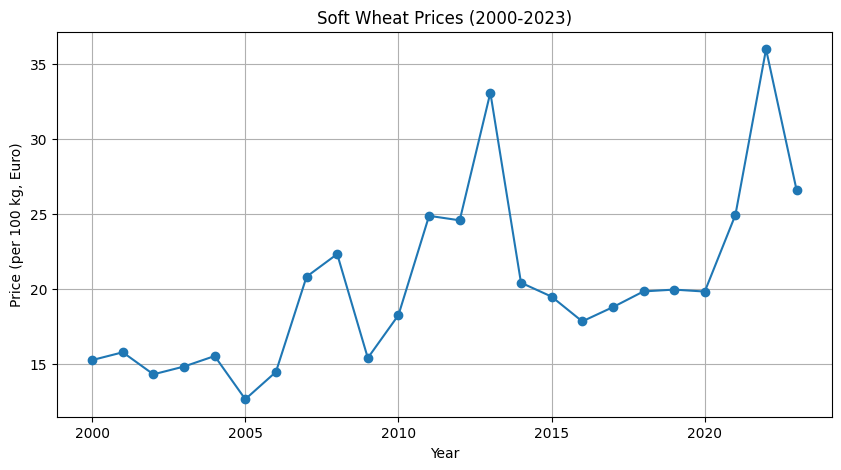

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['price'], marker='o', linestyle='-')
plt.title('Soft Wheat Prices (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Price (per 100 kg, Euro)')
plt.grid(True)
plt.show()

In [ ]:
# 1. Augmented Dickey-Fuller Test
adf_result = adfuller(data["price"])

# 2. KPSS Test
kpss_result = kpss(data["price"])

print("\n1. Augmented Dickey-Fuller Test")
print("H0: Series has a unit root (non-stationary)")
print("H1: Series is stationary")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Critical values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value:.4f}")

print("\n2. KPSS Test")
print("H0: Series is trend stationary")
print("H1: Series has a unit root (non-stationary)")
print(f"KPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")



1. Augmented Dickey-Fuller Test
H0: Series has a unit root (non-stationary)
H1: Series is stationary
ADF Statistic: -2.3072
p-value: 0.1697
Critical values:
	1%: -3.7529
	5%: -2.9985
	10%: -2.6390

2. KPSS Test
H0: Series is trend stationary
H1: Series has a unit root (non-stationary)
KPSS Statistic: 0.5182
p-value: 0.0376


ADF nevýznamný
KPSS významný -> nestacionární, ex. jednotkový kořen

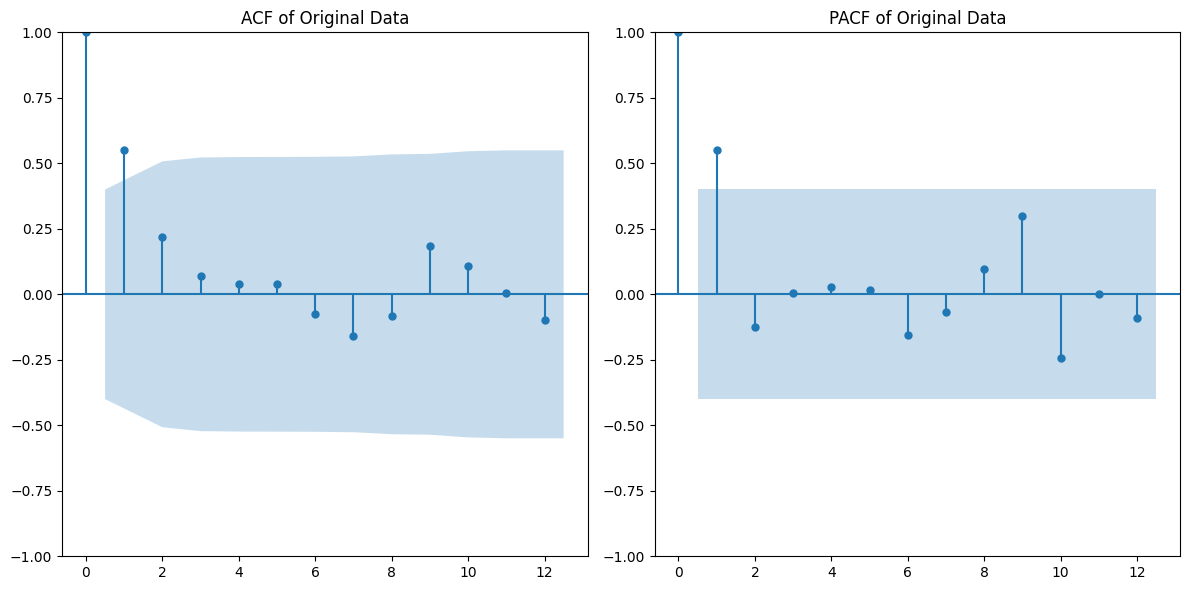

In [ ]:
# Plot ACF and PACF for original data
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(data['price'], lags=12, ax=plt.gca())
plt.title("ACF of Original Data")

# PACF plot
plt.subplot(122)
plot_pacf(data['price'], lags=12, ax=plt.gca(), method='ywm')
plt.title("PACF of Original Data")

plt.tight_layout()
plt.show()

ARIMA?
Zkusíme diferenciovani

In [ ]:
data_dff = data.copy()
data_dff["price"] = data['price'].diff().dropna()

In [ ]:
adf_result_dff = adfuller(data_dff['price'].dropna())
kpss_result_dff = kpss(data_dff["price"].dropna())

print("\nAugmented Dickey-Fuller Test")
print("H0: Series has a unit root (non-stationary)")
print("H1: Series is stationary")
print(f"ADF Statistic: {adf_result_dff[0]:.4f}")
print(f"p-value: {adf_result_dff[1]:.4f}")
print("Critical values:")
for key, value in adf_result_dff[4].items():
    print(f"\t{key}: {value:.4f}")


print("\n2. KPSS Test")
print("H0: Series is trend stationary")
print("H1: Series has a unit root (non-stationary)")
print(f"KPSS Statistic: {kpss_result_dff[0]:.4f}")
print(f"p-value: {kpss_result_dff[1]:.4f}")



Augmented Dickey-Fuller Test
H0: Series has a unit root (non-stationary)
H1: Series is stationary
ADF Statistic: -5.5196
p-value: 0.0000
Critical values:
	1%: -3.7697
	5%: -3.0054
	10%: -2.6425

2. KPSS Test
H0: Series is trend stationary
H1: Series has a unit root (non-stationary)
KPSS Statistic: 0.2417
p-value: 0.1000


Dickey-Fuller významný, KPSS nevýznamný - stacionární

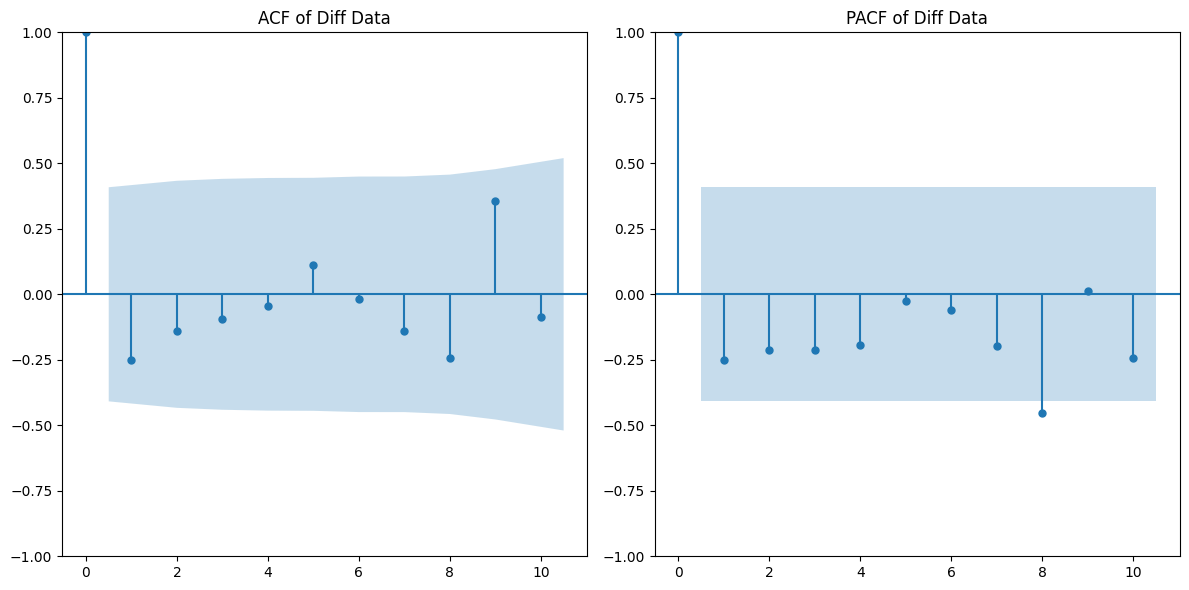

In [ ]:
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(data_dff['price'].dropna(), lags=10, ax=plt.gca())
plt.title("ACF of Diff Data")

# PACF plot
plt.subplot(122)
plot_pacf(data_dff['price'].dropna(), lags=10, ax=plt.gca(), method='ywm')
plt.title("PACF of Diff Data")

plt.tight_layout()
plt.show()

## ARIMA

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   24
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -70.055
Date:                Mon, 20 Jan 2025   AIC                            144.110
Time:                        19:22:39   BIC                            146.381
Sample:                             0   HQIC                           144.682
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2561      0.177     -1.449      0.147      -0.603       0.090
sigma2        25.8148      7.119      3.626      0.000      11.863      39.767
Ljung-Box (L1) (Q):                   0.17   Jarque-

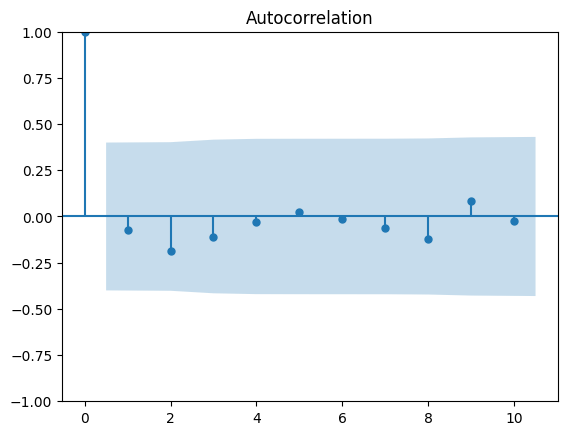

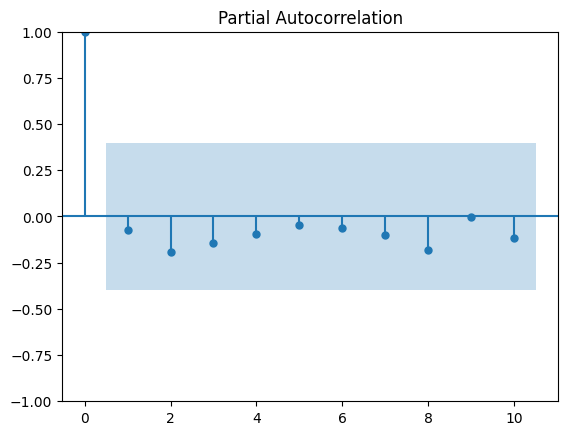

24    28.962752
25    28.344772
26    28.503056
27    28.462515
28    28.472898
Name: predicted_mean, dtype: float64


In [ ]:
model = ARIMA(data['price'], order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

residuals = model_fit.resid
plot_acf(residuals, lags=10, alpha=0.05)
plot_pacf(residuals, lags=10, alpha=0.05)
plt.show()

forecast = model_fit.forecast(steps=5)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   24
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -70.759
Date:                Mon, 20 Jan 2025   AIC                            143.517
Time:                        19:22:40   BIC                            144.653
Sample:                             0   HQIC                           143.803
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        27.5236      7.300      3.770      0.000      13.216      41.831
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.20   Pr

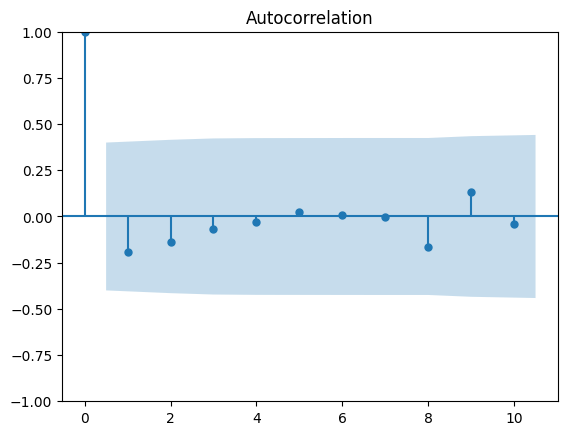

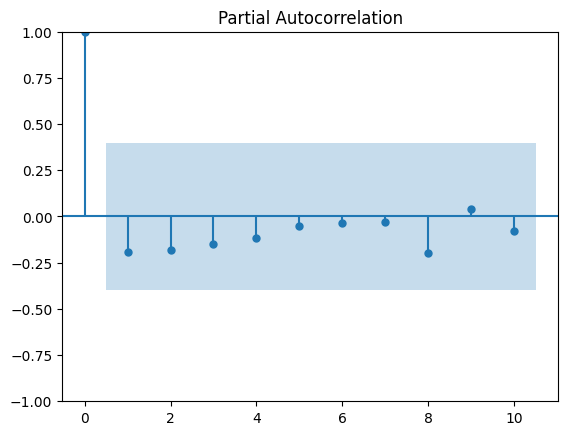

In [ ]:
model = ARIMA(data['price'], order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

residuals = model_fit.resid
plot_acf(residuals, lags=10, alpha=0.05)
plot_pacf(residuals, lags=10, alpha=0.05)
plt.show()


## ExponentialSmoothing (damped trend)

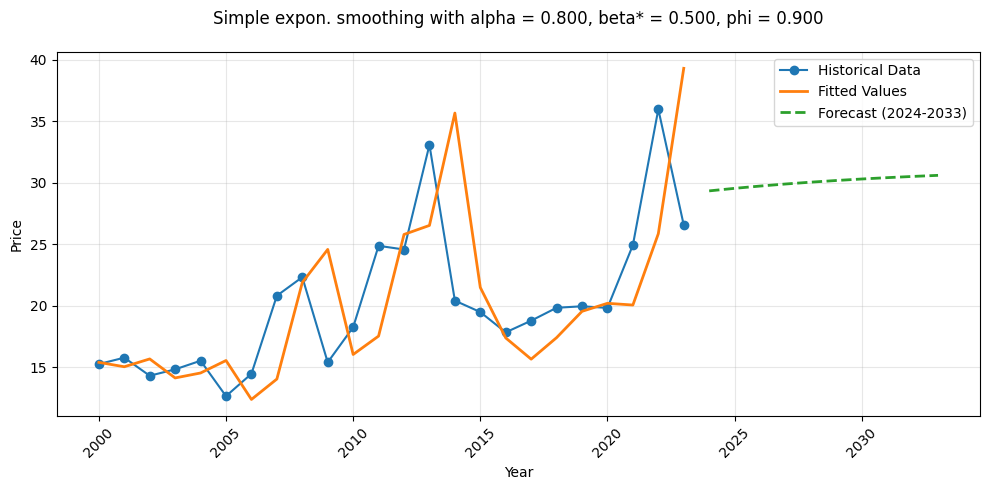

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    price   No. Observations:                   24
Model:             ExponentialSmoothing   SSE                            792.459
Optimized:                         True   AIC                             93.930
Trend:                         Additive   BIC                             99.820
Seasonal:                          None   AICC                           100.930
Seasonal Periods:                  None   Date:                 Mon, 20 Jan 2025
Box-Cox:                          False   Time:                         19:22:41
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8000000                alpha                False
smoothing_trend            0.50000

In [ ]:
model_es = smt.ExponentialSmoothing(
    data["price"],
    initialization_method="estimated",
    trend='add',
    damped_trend=True,
    seasonal=None
)

fit = model_es.fit(
    smoothing_level=0.8,
    smoothing_trend=0.5,
    damping_trend=0.9
)

forecast_years = range(2024, 2034)
fcast = fit.forecast(10)
fcast.index = forecast_years

plt.figure(figsize=(10, 5))

plt.title(
    f"Simple expon. smoothing with alpha = {fit.model.params['smoothing_level']:.3f}, "
    f"beta* = {fit.model.params['smoothing_trend']:.3f}, "
    f"phi = {fit.model.params['damping_trend']:.3f}",
    pad=20
)

plt.plot(data.index, data["price"], marker='o', markersize=6, label='Historical Data', color='#1f77b4')
plt.plot(data.index, fit.fittedvalues, label='Fitted Values', color='#ff7f0e', linewidth=2)
plt.plot(forecast_years, fcast, label='Forecast (2024-2033)', color='#2ca02c', linewidth=2, linestyle='--')

plt.legend(loc='best', frameon=True)
plt.grid(True, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Price')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

print(fit.summary())


## Unobserved Components

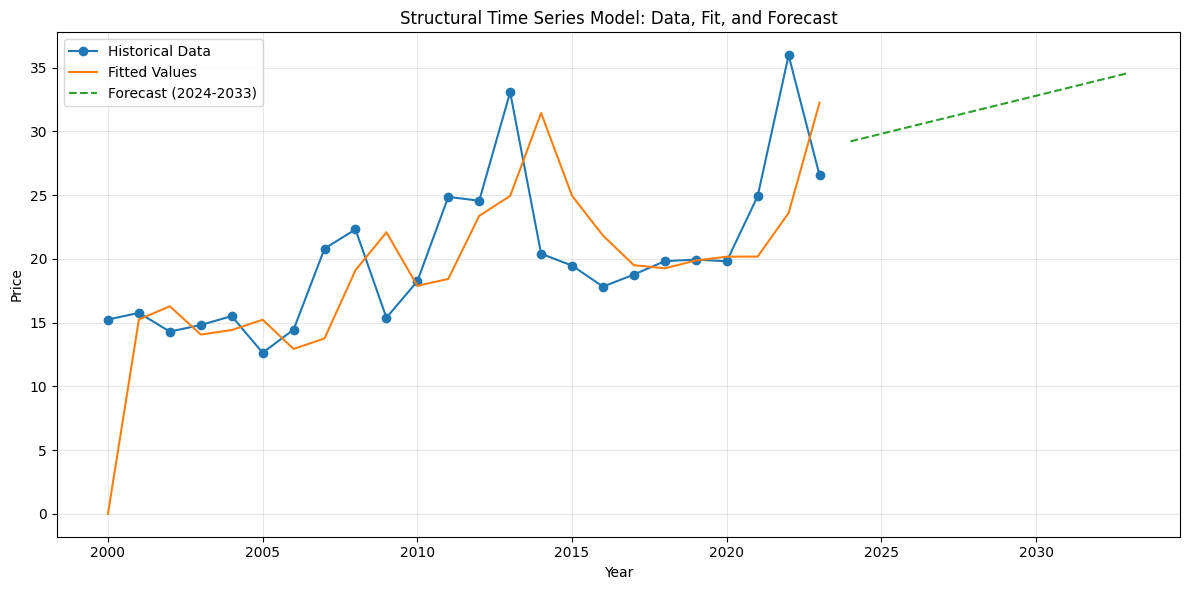


Model Summary:
                        Unobserved Components Results                         
Dep. Variable:                  price   No. Observations:                   24
Model:             local linear trend   Log Likelihood                 -68.752
Date:                Mon, 20 Jan 2025   AIC                            143.504
Time:                        19:22:42   BIC                            146.777
Sample:                             0   HQIC                           144.275
                                 - 24                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     9.5363      8.461      1.127      0.260      -7.046      26.119
sigma2.level         9.6249     15.427      0.624      0.533     -20.611      39.861
sigma2.trend

In [ ]:
model = UnobservedComponents(
    data['price'],
    level="local linear trend",
    trend=True,
    stochastic_level=True,
    stochastic_trend=True,
)

# Fit the model using Kalman filter
fitted_model = model.fit(smoothing_level=0.9,
    smoothing_trend=0.5,
    damping_trend=0.9)

# Create forecasts for next 10 years
forecast = fitted_model.forecast(10)
forecast.index = range(2024, 2034)

# Create single plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price'], 'o-', label='Historical Data', color='#1f77b4')
plt.plot(data.index, fitted_model.fittedvalues, 'r-', label='Fitted Values', color='#ff7f0e')
plt.plot(forecast.index, forecast, '--', label='Forecast (2024-2033)', color='#2ca02c')
plt.title('Structural Time Series Model: Data, Fit, and Forecast')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Print model summary and diagnostics
print("\nModel Summary:")
print(fitted_model.summary())